## Problem 7.10


### Some issues: 

- In Problem 7.10 it is not clear to me what the heating is supposed to be for the first instance (part a) - for now assuming h = 0 
- We should make it clear that the stiffness matrix assembly needs to be modified for the last term to ensure the boundary condition is fixed
- 7.65: should the 'ab' be there since that is to indicate an individual scalar in the matrix?
- 7.62: should also have n+1 n+1 case after this? 
- 7.67: issue in the subscript formatting 
- 7.68: I think this now needs to be edited for n+1 instead of n and formula is different 
- 7.75: floating 'c' character at end of eqn


There are a few mistakes in the notation in Section 7.3 when using more than one element. Let us recap the results, with corrections, before solving the intended numerical problem.

The static heat problem may be expressed, as in Eqn 7.28, as 
\begin{equation}
\sum_{B=1}^n K_{AB}\,d_B = F_A
\end{equation}

for which 
\begin{align*}
K_{AB} &= a(N_A, \, N_B) \\
F_{A} &= \int_0^1 N_a\, h\: \mathrm{d}x \, + \, N_A(0)\,H_0 - a(N_A, \, N_{n+1})\,\theta_1
\end{align*}



#### Global-Element Solution

Considering two elements and three shape functions (7.45-7.47) the matrix elements can be written as 
\begin{align*}
K_{11} &= a(N_1, \, N_1) = \int_{x_1}^{x_2} \frac{-1}{\Delta x_1}  \frac{1}{\Delta x_1} \: \mathrm{d}x =  \frac{1}{\Delta x_1} \\
K_{A-1,\,A} &= a(N_{A-1}, \, N_A) = \int_{x_{A-1}}^{x_A} \frac{-1}{\Delta x_{A-1}}  \frac{1}{\Delta x_{A-1}} \: \mathrm{d}x =  \frac{-1}{\Delta x_{A-1}} \\ 
K_{A,\,A} &= a(N_{A}, \, N_A) = \frac{1}{\Delta x_{A-1}} + \frac{1}{\Delta x_{A}} \\ 
K_{n+1, \, n+1} &= a(N_{n+1},\, N_{n+1}) =  \frac{1}{\Delta x_{N}}
\end{align*}
for $A = 2, n$. 

Similarly the heat vector components are
\begin{align*}
F_{1} &= \int_{x_1}^{x_2} N_1 \, h \: \mathrm{d}x \: + H_0 \\ 
F_{A} &= \int_{x_{A-1}}^{x_A} N_A \, h \: \mathrm{d}x \: +  \int_{x_{A}}^{x_{A+1}} N_A \, h \: \mathrm{d}x \: = \int_{x_{A-1}}^{x_A} \frac{(x-x_{A-1}) \, h}{\Delta x_{A-1}} \: \mathrm{d}x \: +  \int_{x_{A}}^{x_{A+1}} \frac{(x_{A+1} - x) \, h}{\Delta x_{A}} \: \mathrm{d}x \: \\ 
F_{n+1} &= \int_{x_n}^{x_{n+1}} \frac{(x-x_n)\,h}{\Delta x_n} \: \mathrm{d}x \: + \frac{\theta_1}{\Delta x_n} \\ 
\end{align*}


#### Local-Element Solution

Now let us consider the case with $n$ elements (nodes from $x_1$ to $x_{n+1}$). The elements of the local diffusivity matrix are given in 7.60-7.62. It is, however, missing the case for $K_{n+1\,n+1}$, 

\begin{align*}
K_{11}       &= k^1_{11} \\ 
K_{A-1\,A}   &= k^{A-1}_{12} \\ 
K_{A\,A}     &= k^{A-1}_{22} + k^{A}_{11} \\ 
K_{n+1\,n+1} &= k^{n}_{22} 
\end{align*}

In Problem 7.9, it is shown that 

\begin{equation}
k^A_{ab} = \frac{(-1)^{a+b}}{\Delta x_A}
\end{equation}
which holds for $A = 1,\, n$ inclusive.

Similarly the heat supply vector may be written as 

\begin{align*}
F_{1}        &= f^1_{1} + H_0 \\ 
F_{A}        &= f^{A-1}_{2} + f^{A}_{1} \\ 
F_{n+1} &= f^{n}_{2} + \frac{\theta_1}{\Delta x_n}
\end{align*}

where 
\begin{equation}
f_a^A = \int_{x_A}^{x_{A+1}} N_a \, h \:\mathrm{d}x
\end{equation}

**Question: should $F_{n}$ also have a contribtion from $\theta_1$ since $a(N_n, N_{n+1})$ is not 0** 


#### The element-wise weak form

Eqns. 7.70 - 7.76 show that the LHS of 7.28 can be written as 

\begin{equation}
\int_0^1 \left( \partial_x \tilde{\theta} \right)\left( \partial_x \theta \right) \: \mathrm{d}x = \sum_{e=1}^n \sum_{a=1}^2 \sum_{b=1}^2 c_a d_b k_{ab}^e
\end{equation}

and the RHS can be written as 

\begin{equation}
\int_0^1 \tilde{\theta}  \, h \: \mathrm{d}x + \tilde{\theta}(1)\partial_x\theta(1) - \tilde{\theta(0)}\partial_x\theta(0)  = \sum_{e=1}^n \sum_{a=1}^2  c_a f_{a}^e
\end{equation}

### Some code - finally

Note here that the textbook has indices going from $1$ to $n$. Python indexes starting at 0 so our indices will be from $0$ to $n$ and the first element of a matrix will be $K_{00}$.

Note that in part (a) of this question we are solving for $h=0$ (Im assuming?)

[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0. 10.]


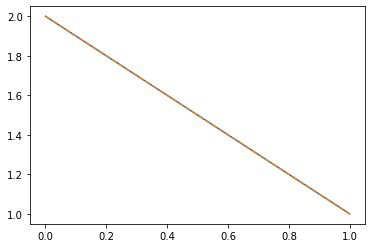

In [63]:
import numpy as np 
import scipy.linalg as sl
import matplotlib.pyplot as plt 
# Boundary conditions: 
theta_1 = 1
H0      = 1

nelem   = 10        # number of elements, n
np1     = nelem + 1 # n+1

# Global domain node locations
x = np.linspace(0, 1, nelem+1)

# Compute Delta x for each element: 
dx = x[1:] - x[:-1]

# Create our diffusivity matrix: 
K = np.zeros((np1, np1))

# Create global heating matrix:
F = np.zeros(np1)

for ielem in range(nelem): 
    # Compute local diffusivity matrix for this element: 
    # using 7.65
    kloc = np.zeros((2,2))
    kloc[0,0] = 1
    kloc[1,1] = 1
    kloc[0,1] = -1
    kloc[1,0] = -1
    
    # Multiply by grid spacing
    kloc *= (1/dx[ielem])

    # Add to the global matrix: 
    K[ielem:ielem+2, ielem:ielem+2] += kloc
    
    
    # Create local forcing vector for element: 
    # In the case that h = 0, we know floc is also 0 except at the boundaries
    floc = np.zeros(2)
    if ielem == 0: 
        floc[0] += H0
    elif ielem == nelem-1: 
        floc[1] += theta_1/dx[ielem]
    
    # Add to the global vector: 
    F[ielem:ielem+2] += floc


# IMPORTANT: 
# This needs to be done so that the last row is only
# the last element - this enforces the boundary condition
K[-1, -2 ] = 0
    
# Compute d as K^-1 * F 
Kinv = np.linalg.inv(K)

print(F)

d = np.matmul(Kinv, F)


# Plot against analytical
# When h is 0: 
theta = theta_1 + (1-x)*H0

fig, ax = plt.subplots()

ax.plot(x, theta)
ax.plot(x, d, '--')